In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 
pd.set_option('display.max_rows', 10)
import scipy
from sklearn import metrics
import time
from scipy.stats import gaussian_kde

In [33]:
# make arrays of the data:
original_exp = [-11, -10, -4.5, -8, -3, -5, -6]
improved_prediction = [-10, -10.2, -3.8, -7.1, -2.5, -5.5, -6]
worse = [-9, -11, -7, -6, -1, -2, -9]




plt.rcParams.update({'font.size': 8})

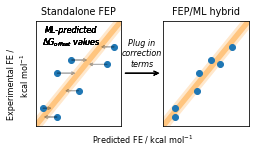

In [78]:
# make base plot with annotations:
fig, axes = plt.subplots(1, 2, figsize=(3.25, 1.75))

# plot the noisy prediction:
axes[0].scatter(worse, original_exp)


# generate a better prediction and plot:
improved_prediction = []
for pred, exp in zip(worse, original_exp):
    average = (pred + exp + exp)/3
    improved_prediction.append(average)
axes[1].scatter(improved_prediction, original_exp)
    
    
for ax in axes:
    # set limits:
    ax.set_ylim(-12, 0)
    ax.set_xlim(-12, 0)
    
    # make diagonals:
    ax.fill_between(
                    x=[-25, 0], 
                    y2=[-24.5,0.5],
                    y1=[-25.5,-0.5],
                    lw=0, 
                    zorder=-10,
                    alpha=0.5,
                    color="darkorange")
    # upper bound:
    ax.fill_between(
                    x=[-25, 0], 
                    y2=[-24,1],
                    y1=[-24.5,0.5],
                    lw=0, 
                    zorder=-10,
                    color="darkorange", 
                    alpha=0.2)
    # lower bound:
    ax.fill_between(
                    x=[-25, 0], 
                    y2=[-25.5,-0.5],
                    y1=[-26,-1],
                    lw=0, 
                    zorder=-10,
                    color="darkorange", 
                    alpha=0.2)

    # remove axis info:   
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    
# add textual information:
plt.tight_layout(w_pad=4.8)    
axes[0].set_title("Standalone FEP")
axes[1].set_title("FEP/ML hybrid")

axes[0].text(s="Experimental FE / \n         kcal mol$^{-1}$", x=-16, y=-11, rotation=90)
axes[0].text(s=r"Predicted FE / kcal mol$^{-1}$", x=3, y=-14, ha="center")



axes[0].arrow(x=0.5, y=-6, dx=4, dy=0, clip_on=False, head_width=0.5, color="black", overhang=0.8)
axes[0].text(s="Plug in\ncorrection\nterms", x=2.85, y=-2, style='oblique', ha='center',
         va='top', wrap=True)

# add correction term arrows:

for pred, corrected_pred, exp in zip(worse, improved_prediction, original_exp):
    predicted_offset = corrected_pred - pred

    axes[0].arrow(x=pred, y=exp, dx=predicted_offset, dy=0, overhang=0.8, head_width=0.3, alpha=0.3)
    axes[0].text(s="ML-predicted\n$\Delta$G$_{offset}$ values", x=-7, y=-0.5, style='oblique', ha='center', 
                 va='top')




        
        
plt.savefig("TOC_fig.png", dpi=300, bbox_inches="tight")
plt.show()